In [1]:
import numpy as np
from enum import Enum
from matplotlib import pyplot as pp
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

import sys
from tensorflow.keras.optimizers import SGD, Adam
import sklearn.metrics

In [2]:
dataset1 = pd.read_csv('dataI.csv',sep=';')

X1=dataset1.iloc[:,3:-1]
Y1=np.ravel(dataset1.label)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, random_state=23)

# Define the scaler 
scaler1 = StandardScaler().fit(X1_train)

# Scale the train and test sets
X1_train = scaler1.transform(X1_train)
X1_test = scaler1.transform(X1_test)

print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(15000, 200)
(5000, 200)
(15000,)
(5000,)


In [3]:
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(200,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()

opt1 = tf.keras.optimizers.Adam(#learning_rate=0.1)
                        )

model1.compile(loss='binary_crossentropy',
              optimizer=opt1,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 21,121
Trainable params: 21,121
Non-trainable params: 0
_________________________________________________________________


In [4]:
history1 = model1.fit(X1_train, Y1_train, validation_split = 0.20, epochs=15)

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.2514 - accuracy: 0.8797 - val_loss: 0.1373 - val_accuracy: 0.9407
Epoch 2/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1240 - accuracy: 0.9396 - val_loss: 0.1100 - val_accuracy: 0.9463
Epoch 3/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1114 - accuracy: 0.9429 - val_loss: 0.1368 - val_accuracy: 0.9517
Epoch 4/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.9452 - val_loss: 0.0931 - val_accuracy: 0.9517
Epoch 5/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0951 - accuracy: 0.9515 - val_loss: 0.0841 - val_accuracy: 0.9570
Epoch 6/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9519 - val_loss: 0.0758 - val_accuracy: 0.9680
Epoch 7/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9622 - val_loss: 0.0709 - val_accuracy: 0.9730
Epoch 

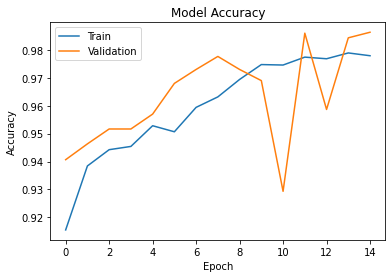

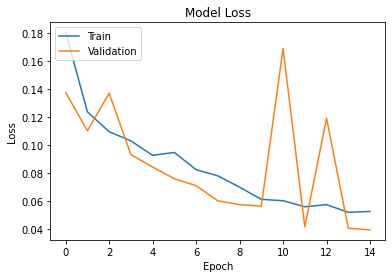

In [5]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

157/157 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9876
[0.04188265651464462, 0.9876000285148621]
['loss', 'accuracy']


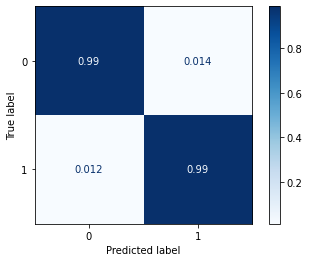

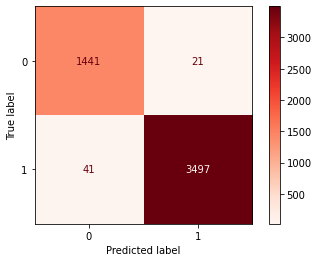

In [18]:
score1 = model1.evaluate(X1_test, Y1_test)
print(score1)
print(model1.metrics_names)

resultados1 = np.around(model1.predict(X1_test))

cm1 = confusion_matrix(Y1_test, resultados1, normalize='true')
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap= 'Blues')
plt.savefig('2CM1A.jpg')

cm1 = confusion_matrix(Y1_test, resultados1, normalize=None)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap= 'Reds')
plt.savefig('2CM1B.jpg')

In [7]:
dataset2=pd.read_csv("dataII.csv",sep=";")

X2=dataset2.iloc[:,4:-1]
Y2=np.ravel(dataset2.label)

def tempMap(Y):
    return np.where(Y==2,0,1)
def tempUnmap(Y):
    return np.where(Y==0,2,1)

Y2 = tempMap(Y2)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state=23)

# Define the scaler 
scaler2 = StandardScaler().fit(X2_train)

# Scale the train and test sets
X2_train = scaler2.transform(X2_train)
X2_test = scaler2.transform(X2_test)

print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

(15000, 200)
(5000, 200)
(15000,)
(5000,)


In [8]:
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(200,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model2.output_shape)
model2.summary()

opt2 = tf.keras.optimizers.Adam(#learning_rate=0.8)
                        )

model2.compile(loss='binary_crossentropy',
              optimizer=opt2,
              metrics=['accuracy'])

(None, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 21,121
Trainable params: 21,121
Non-trainable params: 0
_________________________________________________________________


In [9]:
history2 = model2.fit(X2_train, Y2_train, validation_split = 0.20, epochs=15)

Epoch 1/15
375/375 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.7770 - val_loss: 0.2911 - val_accuracy: 0.8817
Epoch 2/15
375/375 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8452 - val_loss: 0.2691 - val_accuracy: 0.8740
Epoch 3/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2830 - accuracy: 0.8634 - val_loss: 0.2553 - val_accuracy: 0.8943
Epoch 4/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.8725 - val_loss: 0.2700 - val_accuracy: 0.8667
Epoch 5/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.8765 - val_loss: 0.2423 - val_accuracy: 0.8993
Epoch 6/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2554 - accuracy: 0.8864 - val_loss: 0.2408 - val_accuracy: 0.8893
Epoch 7/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2523 - accuracy: 0.8817 - val_loss: 0.2172 - val_accuracy: 0.9097
Epoch 

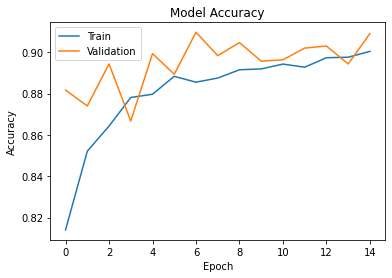

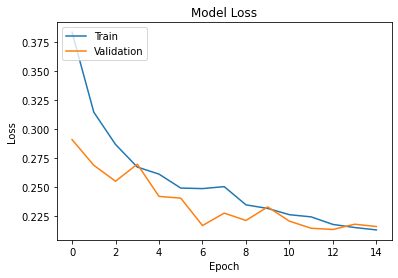

In [10]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

157/157 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9100
[0.2170332819223404, 0.9100000262260437]
['loss', 'accuracy']


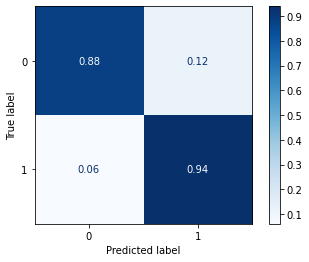

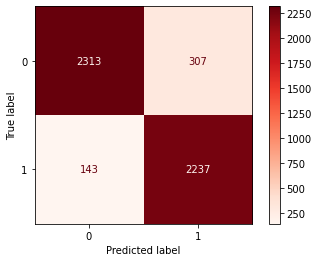

In [11]:
score2 = model2.evaluate(X2_test, Y2_test)
print(score2)
print(model2.metrics_names)

resultados2 = np.around(model2.predict(X2_test))

cm2 = confusion_matrix(Y2_test, resultados2, normalize='true')
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap= 'Blues')
plt.savefig('2CM2A.jpg')

cm2 = confusion_matrix(Y2_test, resultados2, normalize=None)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap= 'Reds')
plt.savefig('2CM2B.jpg')

In [12]:
X3=np.concatenate((X1,X2),axis=0)
Y2= tempUnmap(Y2)
Y3=np.concatenate((Y1,Y2),axis=0)

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, random_state=23)

# Define the scaler 
scaler = StandardScaler().fit(X3_train)

# Scale the train and test sets
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

print(X3_train.shape)
print(X3_test.shape)
print(Y3_train.shape)
print(Y3_test.shape)

(30000, 200)
(10000, 200)
(30000,)
(10000,)


In [13]:
Y3_train = to_categorical(Y3_train)
Y3_test= to_categorical(Y3_test)

In [14]:
model3 = tf.keras.Sequential([
    tf.keras.Input(shape=(200,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

opt3 = tf.keras.optimizers.Adam(#learning_rate=0.8)
                        )

model3.compile(loss='categorical_crossentropy',
              optimizer=opt3,
              metrics=['accuracy'])

In [15]:
history3 = model3.fit(X3_train, Y3_train, validation_split = 0.15,epochs=40)

Epoch 1/40
797/797 [==============================] - 2s 3ms/step - loss: 0.6407 - accuracy: 0.7304 - val_loss: 0.4661 - val_accuracy: 0.8187
Epoch 2/40
797/797 [==============================] - 2s 2ms/step - loss: 0.4352 - accuracy: 0.8333 - val_loss: 0.3641 - val_accuracy: 0.8642
Epoch 3/40
797/797 [==============================] - 2s 3ms/step - loss: 0.3722 - accuracy: 0.8592 - val_loss: 0.3301 - val_accuracy: 0.8753
Epoch 4/40
797/797 [==============================] - 2s 2ms/step - loss: 0.3366 - accuracy: 0.8715 - val_loss: 0.3094 - val_accuracy: 0.8918
Epoch 5/40
797/797 [==============================] - 2s 2ms/step - loss: 0.2958 - accuracy: 0.8884 - val_loss: 0.2872 - val_accuracy: 0.8927
Epoch 6/40
797/797 [==============================] - 2s 2ms/step - loss: 0.2792 - accuracy: 0.8941 - val_loss: 0.2468 - val_accuracy: 0.9100
Epoch 7/40
797/797 [==============================] - 2s 2ms/step - loss: 0.2603 - accuracy: 0.9019 - val_loss: 0.2483 - val_accuracy: 0.9133
Epoch 

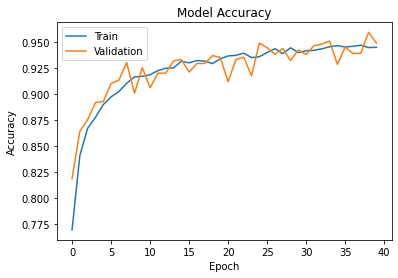

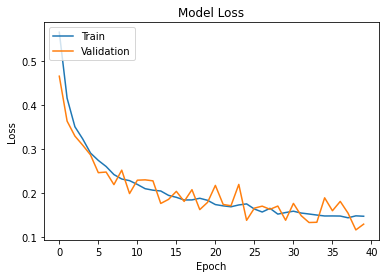

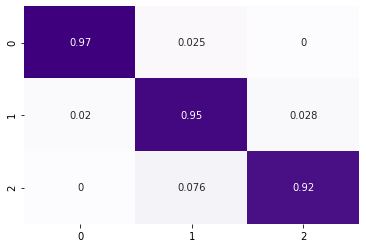

In [16]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('2Acuracy3.jpg')
plt.show()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('2Loss3.jpg')
plt.show()
Ypred3=np.argmax(model3.predict(X3_test),axis=1)
Ytest3=np.argmax(Y3_test,axis=1)
confusion = sklearn.metrics.confusion_matrix(Ytest3,Ypred3,normalize='true')
import seaborn as sb
sb.heatmap(confusion,cbar=False,cmap='Purples',annot=True)
plt.savefig('2CM3.jpg')
plt.show()

In [17]:
score3 = model3.evaluate(X3_test, Y3_test)
print(score3)
print(model3.metrics_names)

313/313 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9566
[0.12261465191841125, 0.95660001039505]
['loss', 'accuracy']
